In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
db = np.load('pahdb.npy', allow_pickle=True)

color = {
    1: 'silver',  # H
    6: 'dimgray',  # C
    7: 'blue',  # N
    8: 'red',  # O
    12: 'greenyellow',  # Mg
    14: 'darkcyan',  # Si
    26: 'slateblue',  # Fe
}

In [3]:
db[952]

{'uid': 2648,
 'formula': 'C30',
 'geometry': array([[ 1.000000e+00,  2.439792e+00,  6.418600e-01,  2.120930e-01,
          6.000000e+00],
        [ 2.000000e+00,  2.716588e+00, -7.794990e-01,  1.390880e-01,
          6.000000e+00],
        [ 3.000000e+00,  1.645532e+00, -1.806965e+00,  4.040120e-01,
          6.000000e+00],
        [ 4.000000e+00,  4.108360e-01, -1.312424e+00,  8.876900e-01,
          6.000000e+00],
        [ 5.000000e+00,  3.170340e-01,  4.469500e-02,  1.066790e+00,
          6.000000e+00],
        [ 6.000000e+00,  1.140176e+00,  1.058818e+00,  6.228990e-01,
          6.000000e+00],
        [ 7.000000e+00,  2.721878e+00,  2.909325e+00, -3.562960e-01,
          6.000000e+00],
        [ 8.000000e+00,  3.374917e+00,  1.691638e+00, -2.935090e-01,
          6.000000e+00],
        [ 9.000000e+00,  5.100910e-01,  2.339312e+00,  3.418950e-01,
          6.000000e+00],
        [ 1.000000e+01,  1.517550e+00,  3.177263e+00, -1.173730e-01,
          6.000000e+00],
        [ 1.100

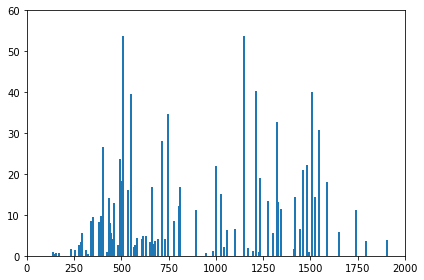

In [4]:
t = db[952]['transitions']

fig1, ax1 = plt.subplots(1, 1, tight_layout=True)
ax1.set_xlim((0, 2000))
ax1.set_ylim((0, 60))
for i in t:
    ax1.axvline(x=i[0], ymin=0, ymax=i[1] / 60, lw=2)

<IPython.core.display.Javascript object>


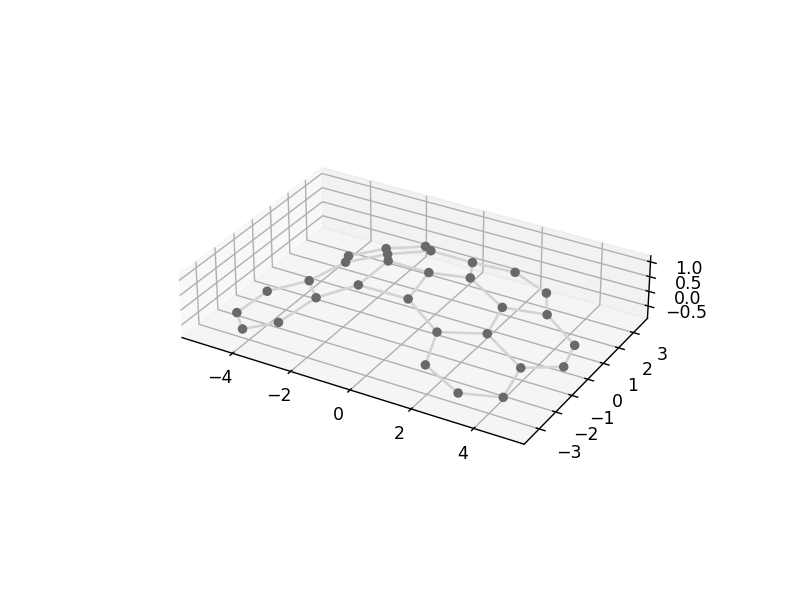

In [5]:
%matplotlib notebook

geo = db[952]['geometry']

fig2 = plt.figure()
ax2 = fig2.add_subplot(projection='3d')
ax2.scatter(geo[:, 1], geo[:, 2], geo[:, 3],
            c=[color[i] for i in geo[:, -1]],
            depthshade=False)

for a in range(geo.shape[0]):
    for b in range(a + 1, geo.shape[0]):
        dis = np.linalg.norm(geo[a, 1:4] - geo[b, 1:4])
        if dis < 1.75:
            ax2.plot3D(geo[[a, b], 1], geo[[a, b], 2], geo[[a, b], 3], c='lightgray')

x_min, x_max = ax2.get_xlim()
y_min, y_max = ax2.get_ylim()
z_min, z_max = ax2.get_zlim()
ax2.set_box_aspect((x_max - x_min, y_max - y_min, z_max - z_min))